In [1]:
from conturpy import ConturSettings, ConturApplication
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ca = ConturApplication()

In [66]:
dmach = 5 # design mach
throat_radius = 0.26 / 2 # inches

c = ConturSettings()

c["ITLE"] = f"Mach {dmach}"

c["ETAD"] = 60
c["RC"] = 6.0
c["CMC"] = dmach
c["SF"] = throat_radius

c["PPQ"] = 70
c["TO"] = 1000
c["TWT"] = 540
c["TWAT"] = 540

c["XLOW"] = 0
c["XEND"] = 100
c["XINC"] = .1

c.print_to_input(fname=f'm{dmach:.1f}.txt', outdir='inputcards')

In [67]:
res = ca.batch_input_folder('inputcards', output_dir='outputs')

/Users/noahstockwell/Library/CloudStorage/OneDrive-purdue.edu/Documents/Y5S2/AAE 520/contur-search/python/conturpy/read_output.py:392: UserWarning: Boundary Layer: Unable to add unformatted extra CONTUR array output on line 98
  warnings.warn(f"Boundary Layer: Unable to add unformatted extra CONTUR array output on line {idx}")


In [68]:
ca.clean_wd()

In [69]:
xy1 = np.sort(res[0].coordinates.to_numpy()[:, :3], axis=0)
xy2 = res[0].refine_coordinates(21)
noz_length = res[0].sections[-1].parameters[0][0][1]

(-0.24997795, 5.22705295, -0.7799935000000019, 0.7799935000000019)

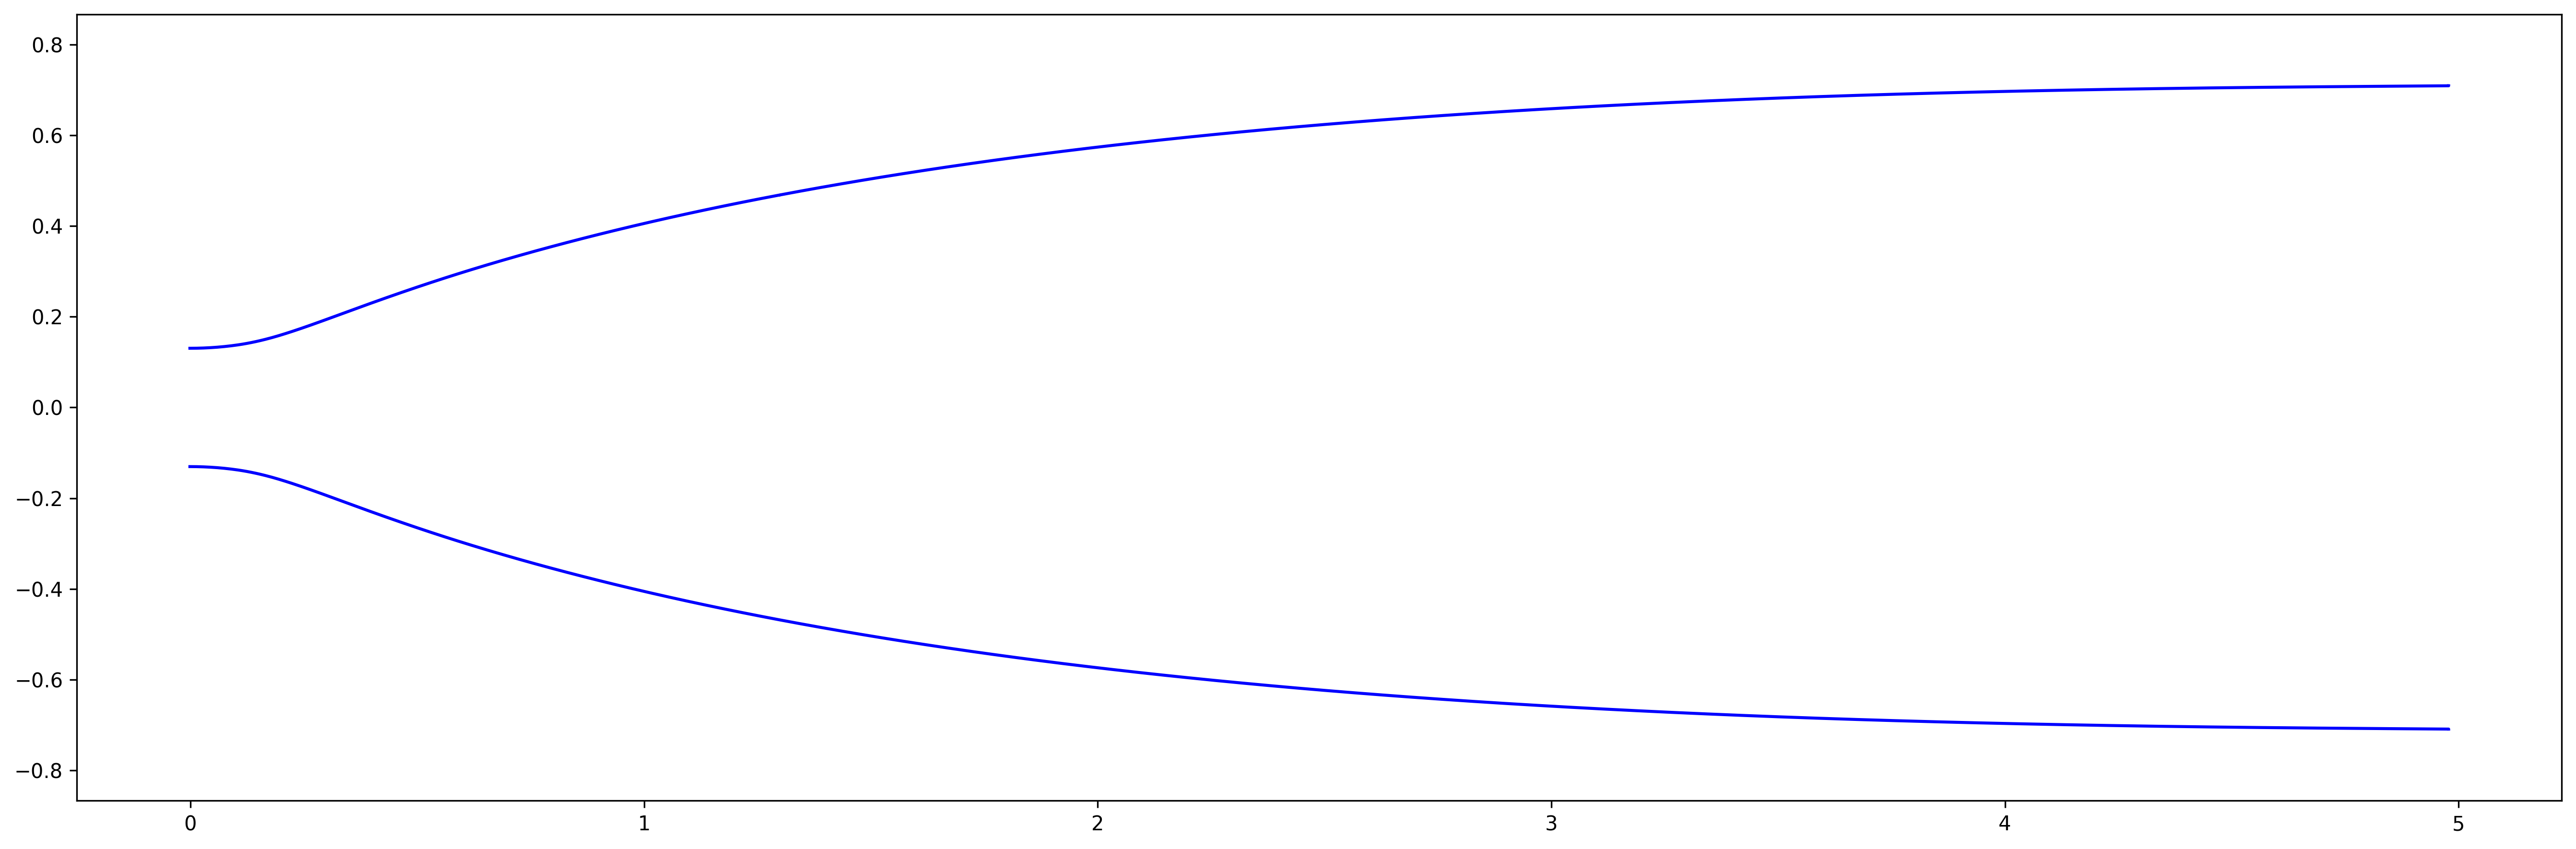

In [70]:
plt.figure(figsize=(18, 6), dpi=300, tight_layout=True)
for xy in [xy2]:
    plot_msk = xy[:, 0] <= noz_length
    plt.plot(xy[plot_msk, 0], xy[plot_msk, 1], 'b')
    plt.plot(xy[plot_msk, 0], -1 * xy[plot_msk, 1], 'b')
plt.axis('equal')

In [55]:
r = res[0]

In [57]:
tab = r.sections[-4]

In [60]:
r.sections[-2].tables[0]

ConturTable(Untitled0   TW          TE          TAW         TP          RE_over_IN  RTHI        FRD         KCF1        KCF         RCFS        H           HI          FMY         KTHP        THETA_1     DELTA       DELTAstar__1  RE_over_FT  DELTA       N           H           THETA       DELTAstar   X           
            1           540         820.1       981.3       625.6       837568      764         1.35708     4.44375     5.8258      5.8258      0.6048      1.4058      4.38422     0           0.000664    0.0048      0.000402      256423      2.22793     5.8546      29.1624     0.0470791   1.37294     33.233      
            2           540         818.2       981.1       625         838500      763         1.3548      4.44435     5.81773     5.81775     0.6086      1.4058      4.38002     0           0.000664    0.0048      0.000404      256423      2.22793     5.8546      29.1624     0.0470791   1.37294     33.233      
            3           540         816.2       980.9  